# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['kidal',
 'turtkul',
 'vaini',
 'suifenhe',
 'porto velho',
 'jamestown',
 'poum',
 'atuona',
 'upington',
 'rikitea',
 'ushuaia',
 'taoudenni',
 'den helder',
 'luderitz',
 'muskogee',
 'punta arenas',
 'tabou',
 'qaanaaq',
 'meulaboh',
 'okhotsk',
 'byron bay',
 'puerto ayora',
 'clyde river',
 'kodiak',
 'zhigansk',
 'safford',
 'ancud',
 'torbay',
 'apple valley',
 'arraial do cabo',
 'rawson',
 'butaritari',
 'san jeronimo',
 'mount pleasant',
 'tumannyy',
 'faya',
 'taseyevo',
 'port elizabeth',
 'narsaq',
 'yellowknife',
 'shenjiamen',
 'colesberg',
 'ribeira grande',
 'bataipora',
 'kudahuvadhoo',
 'bethel',
 'kviteseid',
 'nikolskoye',
 'broken hill',
 'cape town',
 'mackay',
 'saleaula',
 'east london',
 'paucartambo',
 'mataura',
 'castro',
 'akdepe',
 'samarai',
 'taolanaro',
 'progreso',
 'upernavik',
 'grand river south east',
 'margate',
 'new norfolk',
 'iqaluit',
 'hermanus',
 'mariinsk',
 'kalmunai',
 'yenagoa',
 'causapscal',
 'pevek',
 'sokoto',
 'barentsburg',
 's

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

#df = pd.DataFrame(columns={'City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'})
#df['City'] = cities

city = []
cloudiness = []
countries = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

citi_num = 0

print('-----------------------------------')
print('---- Start process-----------------')
print('-----------------------------------')

for i in cities:
    url2 = url + "appid=" + api_key + "&q=" + i + '&units=imperial'
    citi_num += 1
    
    print(f"Processing city number {citi_num} | {i}")
    print(url2)
    
    weather_response = requests.get(url2).json()
    #pprint(weather_response)
        
    try:
        city.append(weather_response['name'])
    except KeyError: 
        print('City does not exist, skipping....')
        
    try:
        cloudiness.append(weather_response['clouds']['all'])
    except KeyError:
        continue
        
    try:
        countries.append(weather_response['sys']['country'])
    except KeyError:
        continue
    
    try:
        date.append(weather_response['dt'])
    except KeyError:   
        continue
 
    try:
        humidity.append(weather_response['main']['humidity'])
    except KeyError:   
        continue
        
    try:
        lat.append(weather_response['coord']['lat'])
    except KeyError:   
        continue
            
    try:
        lng.append(weather_response['coord']['lon'])
    except KeyError:   
        continue
            
    try:
        max_temp.append(weather_response['main']['temp_max'])
    except KeyError:   
        continue
            
    try:
        wind_speed.append(weather_response['wind']['speed'])
    except KeyError:   
        continue
        
print('-----------------------------------')
print('----- End process------------------')
print('-----------------------------------')

#print(city)
#print(cloudiness)   
#print(countries)
#print(date)
#print(humidity)
#print(lat)
#print(lng)
#print(max_temp)
#print(wind_speed)

Processing city number 1 | kidal
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=kidal&units=imperial
Processing city number 2 | turtkul
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=turtkul&units=imperial
City does not exist, skipping....
Processing city number 3 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=vaini&units=imperial
Processing city number 4 | suifenhe
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=suifenhe&units=imperial
Processing city number 5 | porto velho
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=porto velho&units=imperial
Processing city number 6 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=jamestown&units=imperial
Processing city number 7 | poum
http://api.openweathermap.org/data/2.5/weather?appid

City does not exist, skipping....
Processing city number 55 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=mataura&units=imperial
Processing city number 56 | castro
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=castro&units=imperial
Processing city number 57 | akdepe
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=akdepe&units=imperial
Processing city number 58 | samarai
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=samarai&units=imperial
Processing city number 59 | taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=taolanaro&units=imperial
City does not exist, skipping....
Processing city number 60 | progreso
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=progreso&units=imperial
Processing city number 61 | upernavik
http://api

Processing city number 109 | bueu
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=bueu&units=imperial
Processing city number 110 | nantucket
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=nantucket&units=imperial
Processing city number 111 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=sentyabrskiy&units=imperial
City does not exist, skipping....
Processing city number 112 | nome
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=nome&units=imperial
Processing city number 113 | kasungu
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=kasungu&units=imperial
Processing city number 114 | terrace
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=terrace&units=imperial
Processing city number 115 | mahebourg
http://api.openweathermap.org/data/2.

Processing city number 162 | jiroft
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=jiroft&units=imperial
City does not exist, skipping....
Processing city number 163 | mogadishu
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=mogadishu&units=imperial
Processing city number 164 | taburi
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=taburi&units=imperial
City does not exist, skipping....
Processing city number 165 | candolim
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=candolim&units=imperial
Processing city number 166 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=cidreira&units=imperial
Processing city number 167 | morgantown
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=morgantown&units=imperial
Processing city number 168 | qaqor

Processing city number 217 | kroya
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=kroya&units=imperial
Processing city number 218 | arkhangelskoye
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=arkhangelskoye&units=imperial
Processing city number 219 | ruteng
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=ruteng&units=imperial
Processing city number 220 | huaihua
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=huaihua&units=imperial
Processing city number 221 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=attawapiskat&units=imperial
City does not exist, skipping....
Processing city number 222 | magdagachi
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=magdagachi&units=imperial
Processing city number 223 | honiara
http://api.openwe

Processing city number 272 | kristiansand
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=kristiansand&units=imperial
Processing city number 273 | acarau
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=acarau&units=imperial
City does not exist, skipping....
Processing city number 274 | chateauroux
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=chateauroux&units=imperial
Processing city number 275 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=nouadhibou&units=imperial
Processing city number 276 | buala
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=buala&units=imperial
Processing city number 277 | padang
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=padang&units=imperial
Processing city number 278 | felidhoo
http://api.openweatherma

Processing city number 327 | shelburne
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=shelburne&units=imperial
Processing city number 328 | buluang
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=buluang&units=imperial
Processing city number 329 | portland
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=portland&units=imperial
Processing city number 330 | vesele
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=vesele&units=imperial
Processing city number 331 | koulamoutou
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=koulamoutou&units=imperial
Processing city number 332 | suffolk
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=suffolk&units=imperial
Processing city number 333 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=

Processing city number 380 | egvekinot
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=egvekinot&units=imperial
Processing city number 381 | nawa
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=nawa&units=imperial
Processing city number 382 | bulungu
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=bulungu&units=imperial
Processing city number 383 | along
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=along&units=imperial
Processing city number 384 | olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=olafsvik&units=imperial
City does not exist, skipping....
Processing city number 385 | morondava
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=morondava&units=imperial
Processing city number 386 | dalbandin
http://api.openweathermap.org/data/2.5/

Processing city number 433 | port hardy
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=port hardy&units=imperial
Processing city number 434 | pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=pacific grove&units=imperial
Processing city number 435 | waipawa
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=waipawa&units=imperial
Processing city number 436 | ginir
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=ginir&units=imperial
Processing city number 437 | lahuachaca
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=lahuachaca&units=imperial
Processing city number 438 | kankaanpaa
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=kankaanpaa&units=imperial
Processing city number 439 | kahului
http://api.openweathermap.org/data/2.5/weather?ap

Processing city number 487 | laguna
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=laguna&units=imperial
Processing city number 488 | paita
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=paita&units=imperial
Processing city number 489 | dakar
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=dakar&units=imperial
Processing city number 490 | santa cruz
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=santa cruz&units=imperial
Processing city number 491 | matara
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=matara&units=imperial
Processing city number 492 | humaita
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=humaita&units=imperial
Processing city number 493 | caucaia
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142

Processing city number 541 | mahanoro
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=mahanoro&units=imperial
Processing city number 542 | berlevag
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=berlevag&units=imperial
Processing city number 543 | znamenka
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=znamenka&units=imperial
Processing city number 544 | haputale
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=haputale&units=imperial
Processing city number 545 | atikokan
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=atikokan&units=imperial
Processing city number 546 | spornoye
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=spornoye&units=imperial
Processing city number 547 | bellingham
http://api.openweathermap.org/data/2.5/weather?appid=485e7cd

Processing city number 595 | moron
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=moron&units=imperial
Processing city number 596 | kieta
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=kieta&units=imperial
Processing city number 597 | laki
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=laki&units=imperial
Processing city number 598 | lakhimpur
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=lakhimpur&units=imperial
Processing city number 599 | limoeiro do ajuru
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=limoeiro do ajuru&units=imperial
Processing city number 600 | tarko-sale
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=tarko-sale&units=imperial
Processing city number 601 | yerofey pavlovich
http://api.openweathermap.org/data/2.5/weather?ap

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    'City':city,
    'Cloudiness':cloudiness,
    'Country':countries,
    'Date':date,
    'Humidity':humidity,
    'Lat':lat,
    'Lng':lng,
    'Max Temp':max_temp,
    'Wind Speed':wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64

In [5]:
weather_data.head()
#weather_data['Lat']

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kidal,0,ML,1547947125,18,18.44,1.41,54.74,12.57
1,Vaini,0,IN,1547946000,63,15.34,74.49,60.80,2.24
2,Suifenhe,0,CN,1547947191,50,44.39,131.16,4.97,8.66
3,Porto Velho,40,BR,1547946000,83,-8.75,-63.87,78.80,3.36
4,Jamestown,92,AU,1547947006,77,-33.21,138.60,63.51,6.42


In [6]:
weather_data.to_csv('weather_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

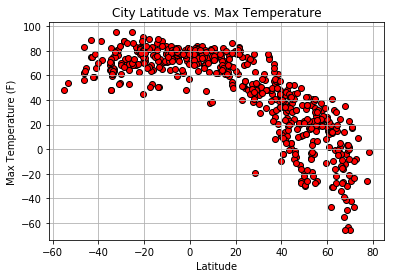

In [7]:
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker='o',color='r',edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature")
plt.savefig('Max_Temp.png')

#### Latitude vs. Humidity Plot

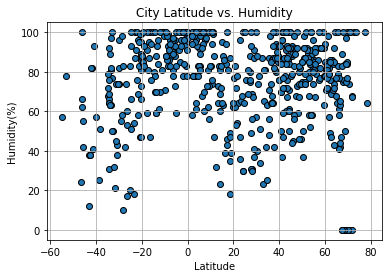

In [8]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker='o',edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("City Latitude vs. Humidity")
plt.savefig('Humidity.png')

#### Latitude vs. Cloudiness Plot

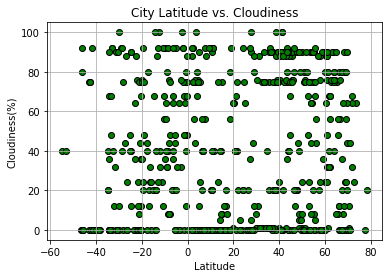

In [9]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker='o',color='g',edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("City Latitude vs. Cloudiness")
plt.savefig('Cloudiness.png')

#### Latitude vs. Wind Speed Plot

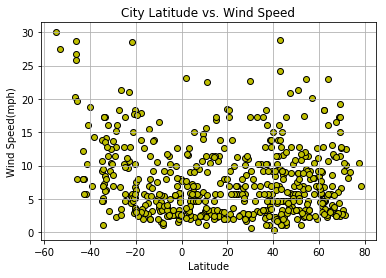

In [10]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker='o',color='y',edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("City Latitude vs. Wind Speed")
plt.savefig('Wind_Speed.png')